In [13]:
import pickle
# To embed plots in the notebooks
%matplotlib inline


import numpy as np


from plotting import *

def get_results(results_file):
    file = open(f"results/{results_file}", "rb") 
    Results = pickle.load(file)
    return Results

def plot_cross_val(Results, show=True, save=True, save_file="cross_validation.png"):
    
    # TODO: this should be able to handle any of our models in RMSE
    
    K = Results['Elastic_Net']['RMSE'].shape[0]
    lines = []
    labels = []
    for model_name in Results.keys():
        _, model_rmse = get_best_rmse(Results, model_name)
        lines.append(model_rmse)
        labels.append(f"{model_name} ({model_rmse.mean().round(2)})")
        

    plt.plot(np.array(lines).T, label=labels)
    plt.xlabel("Folds")
    plt.xticks(np.arange(K))
    plt.ylabel("RMSE")
    lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
    print(lgd)
    

    if save:
        plt.savefig(f"figures/{save_file}",  bbox_extra_artists=(lgd,), bbox_inches='tight')
    if show:
        plt.show()

Legend


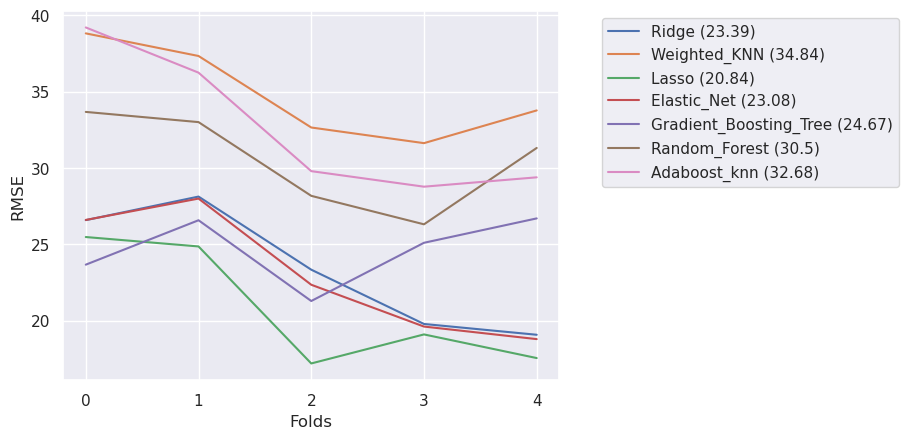

dict_keys(['Ridge', 'Weighted_KNN', 'Lasso', 'Elastic_Net', 'Gradient_Boosting_Tree', 'Random_Forest', 'Adaboost_knn'])

In [23]:
#Results = get_results("results_rmse_1679043804.interactions.pickle")
#Results = get_results("results_rmse_1679053206.interactions2.pickle")
#Results = get_results("results_rmse_1679129588.no_int.pickle")
#Results = get_results("results_rmse_1679134331.int.pickle")
Results = get_results("results_rmse_1679143259.final.pickle")
Results = get_results("results_rmse_1679147708.extended.pickle")
plot_cross_val(Results, show=True, save=True)
Results.keys()

In [24]:
print(get_best_rmse(Results, "Lasso")[0])
get_best_rmse(Results, "Elastic_Net")

[4.86260158 1.91791026 2.3101297  1.09749877 0.75646333]


(array([[3.59381366e-01, 1.00000000e-04],
        [6.73415066e-02, 1.00000000e-04],
        [4.32876128e-01, 3.98107171e-01],
        [2.05651231e-01, 3.98107171e-01],
        [2.05651231e-01, 3.98107171e-01]]),
 array([26.60146604, 28.00116248, 22.359524  , 19.6223851 , 18.80034154]))

# Plot

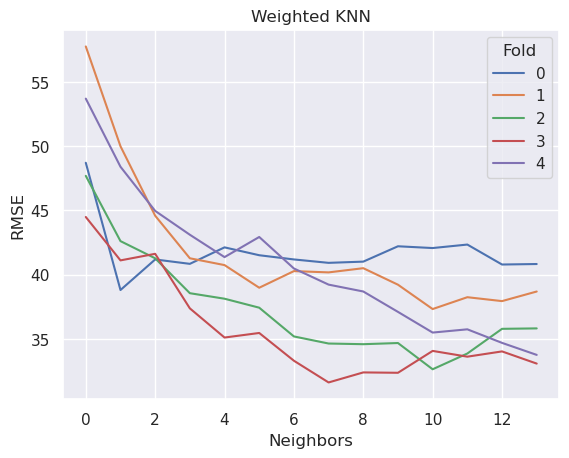

In [25]:
def knn_cv(weighted=True):
    knn = "Weighted_KNN" if weighted else "KNN"
    plt.plot(Results[knn]['RMSE'].T, label=np.arange(5))
    plt.ylabel("RMSE")
    plt.xlabel("Neighbors")
    plt.title("Weighted KNN")
    plt.legend(title='Fold')
    plt.savefig("figures/knn.png", bbox_inches='tight')
    
    plt.show()

knn_cv(weighted = True)

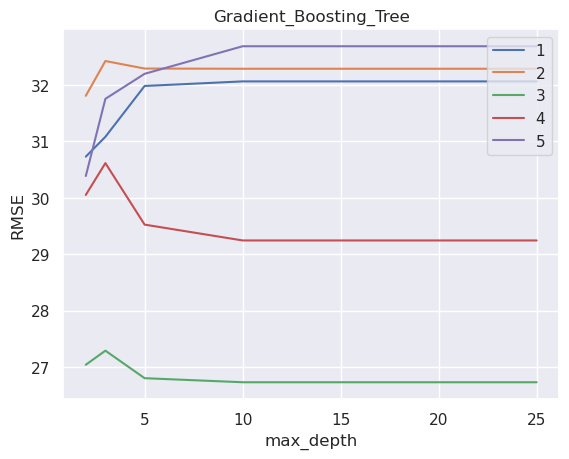

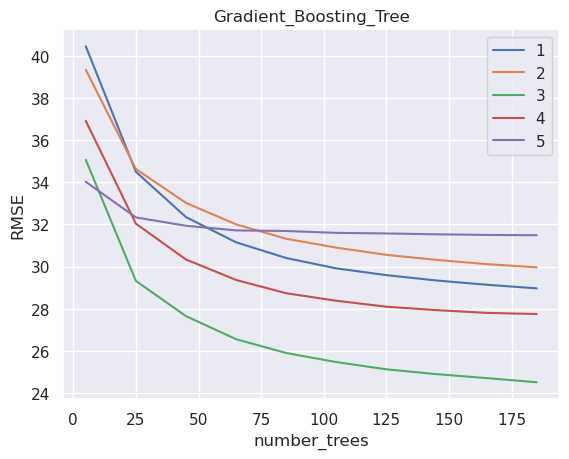

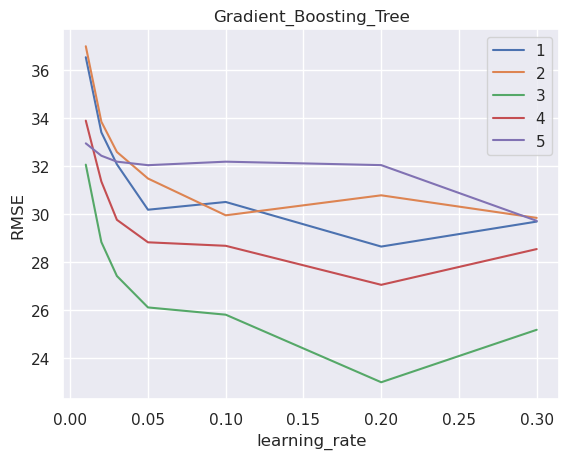

<Figure size 640x480 with 0 Axes>

In [26]:
plot_method_cv(Results, "Gradient_Boosting_Tree", "max_depth")
plot_method_cv(Results, "Gradient_Boosting_Tree", "number_trees")
plot_method_cv(Results, "Gradient_Boosting_Tree", "learning_rate")

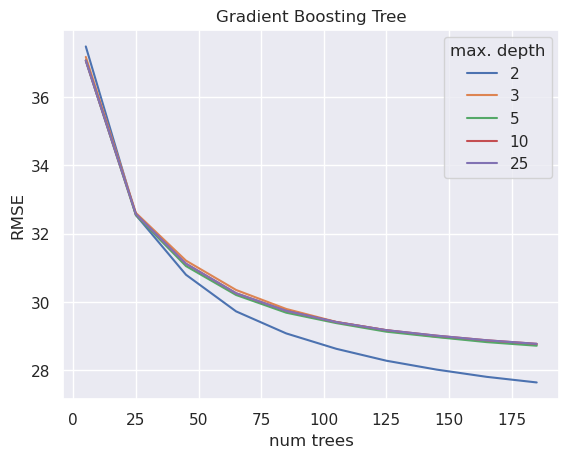

In [27]:
res = Results['Gradient_Boosting_Tree']['RMSE']
grid = []
for i in range(len(Results['Gradient_Boosting_Tree']['number_trees'])):
    temp = res[:, :, i, :].mean(axis=0)
    grid.append(temp.mean(axis=1))
        
grid = np.array(grid)
grid.shape
plt.plot(Results['Gradient_Boosting_Tree']['number_trees'], np.array(grid), label=Results['Gradient_Boosting_Tree']['max_depth'])
plt.xlabel("num trees")
plt.ylabel("RMSE")
plt.legend(title='max. depth')
plt.title("Gradient Boosting Tree")
plt.savefig("figures/gd_trees.png", bbox_inches='tight')

[35.30100519 33.9440471  33.88421152 33.5487608  33.54535742]
[35.10696407 33.90450149 33.06543325 32.87321362 32.87863646]
[34.45788065 33.11788657 32.19924183 31.93503042 31.93510957]
[34.19122378 32.68932809 31.76749188 31.5995142  31.59867976]
[34.14853979 32.66210908 31.57693342 31.29195189 31.29312239]
[34.33115473 32.96354137 31.84620046 31.62524588 31.62942635]
[34.30574393 32.89358874 31.71174343 31.46858202 31.47196131]
[34.43730642 33.06332677 31.80224468 31.54700552 31.55011848]
[34.33720893 32.94691072 31.67030327 31.46966878 31.47112916]
[34.19587606 32.89621469 31.60080538 31.37456466 31.37609294]


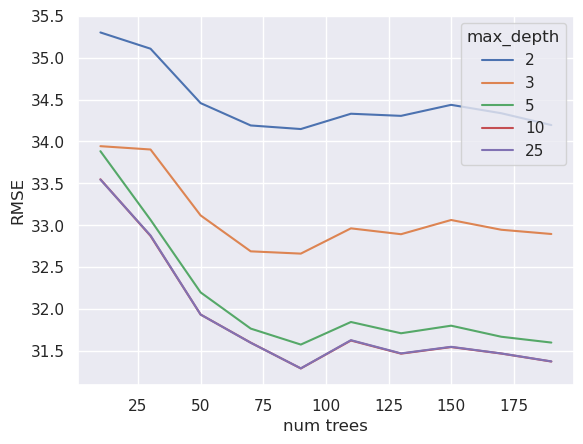

In [28]:
res = Results['Random_Forest']['RMSE']
grid = []
for i in range(len(Results['Random_Forest']['number_trees'])):
    temp = res[:, :, i].mean(axis=0)
    print(temp)
    grid.append(temp)
        
grid = np.array(grid)
grid.shape
plt.plot(Results['Random_Forest']['number_trees'], np.array(grid), label=Results['Random_Forest']['max_depth'])
plt.xlabel("num trees")
plt.ylabel("RMSE")
plt.legend(title='max_depth')